In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
p = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/'

d = {}
d['nn-mse'] = np.load(f'{p}nnbar_NGC_known_mainmse_512_v7_2_main_512.npy', allow_pickle=True)
d['nn-pnll'] = np.load(f'{p}nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['nn-linmse'] = np.load(f'{p}nnbar_NGC_known_mainlinmse_512_v7_2_main_512.npy', allow_pickle=True)
d['nn-linp'] = np.load(f'{p}nnbar_NGC_known_mainlinp_512_v7_2_main_512.npy', allow_pickle=True)
d['nn-pnll-wocos'] = np.load(f'{p}nnbar_NGC_known_mainwocos_512_v7_2_main_512.npy', allow_pickle=True)
d['standard'] = np.load(f'{p}nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)

[(0.96, 1.04), None]

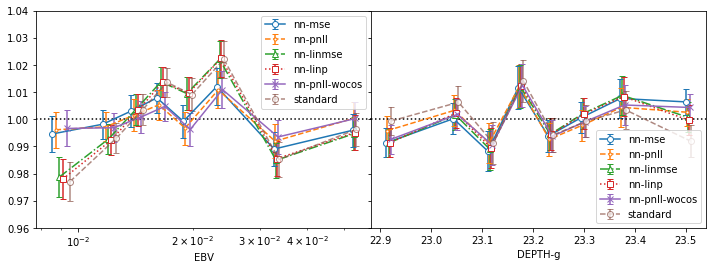

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.0)

chi2 = lambda y,ye:(((y-1.0)/ye)**2.0).sum()

ls = 5*['-', '--', '-.', ':']
mk = 5*['o', '.', '^', 's', 'x']

ix = 1
i = -1
for ni, di in d.items():

    alpha = 1.0 if ni != 'standard' else 0.7  

    for j, ix in enumerate([1, 7]):
        db = 0.0002 if ix==1 else 0.002        

        #print(f"{ni}: {chi2(di[7]['nnbar'], di[7]['nnbar_err']):.1f}")
        #chi2_ = chi2(di[ix]['nnbar'], di[ix]['nnbar_err'])
        ax[j].errorbar(di[ix]['bin_avg']+i*db, di[ix]['nnbar'], di[ix]['nnbar_err'], 
                    label=f'{ni}', #', {chi2_:.1f}', 
                    capsize=3, marker=mk[i+1], mfc='w', ls=ls[i+1], alpha=alpha)
    #     plt.plot(di[ix]['bin_avg']+i*db, di[ix]['nnbar'], 
    #                 label=f'{ni}, {chi2_:.1f}', marker='.', ls='None', alpha=alpha)

    i += 1

for (axi, ni) in zip(ax, ['EBV', 'DEPTH-g']):
    axi.legend()
    axi.axhline(1.0, ls=':', color='k')
    axi.set_xlabel(ni)

ax[0].set(ylim=(0.96, 1.04), xscale='log')    
# plt.legend()#bbox_to_anchor=(1., 1.))    
# plt.ax
# plt.xscale('log')
# plt.xlabel('EBV')
# plt.ylabel('N/Navg')

In [5]:
import nbodykit.lab as nb

In [6]:
p = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/'

d = {}
# d['noweight'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_noweight_mainhighz_512_v7_2_main.json')
d['standard'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json')
d['lin-mse'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_known_mainlinmse_512_v7_2_main.json')
d['lin-pnll'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_known_mainlinp_512_v7_2_main.json')
d['nn-mse'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_known_mainmse_512_v7_2_main.json')
d['nn-pnll'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_known_mainhighz_512_v7_2_main.json')
d['nn-pnll-wocos'] = nb.ConvolvedFFTPower.load(f'{p}spectra_NGC_known_mainwocos_512_v7_2_main.json')

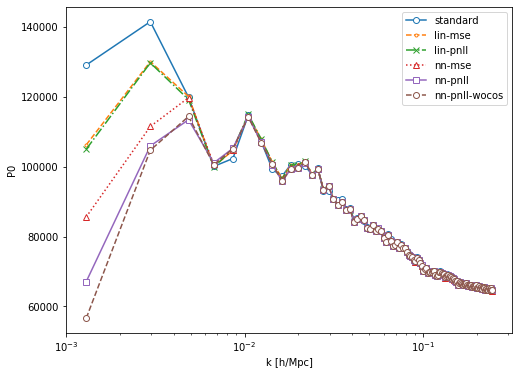

In [8]:
plt.figure(figsize=(8, 6))

ls = 4*['-', '--', '-.', ':']
mk = 4*['o', '.', 'x', '^', 's']

i = 0
for ni, di in d.items():
    
    plt.plot(di.poles['k'], di.poles['power_0'], label=ni, ls=ls[i], marker=mk[i], mfc='w')
    i += 1
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'k [h/Mpc]')
plt.ylabel(r'P0')
plt.savefig('p0_ngc_methods.png', dpi=300, bbox_inches='tight')